https://kaggle-kr.tistory.com/32<br>
https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

# EDA To Prediction (DieTanic)

# Part1: Exploratory Data Analysis(EDA):

1) Analysis of the features.<br>
2) Finding any relations or trends considering multiple features.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 숫자형 데이터만 describe

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Age, Cabin feature null값 다수 존재

data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## How many Survived?

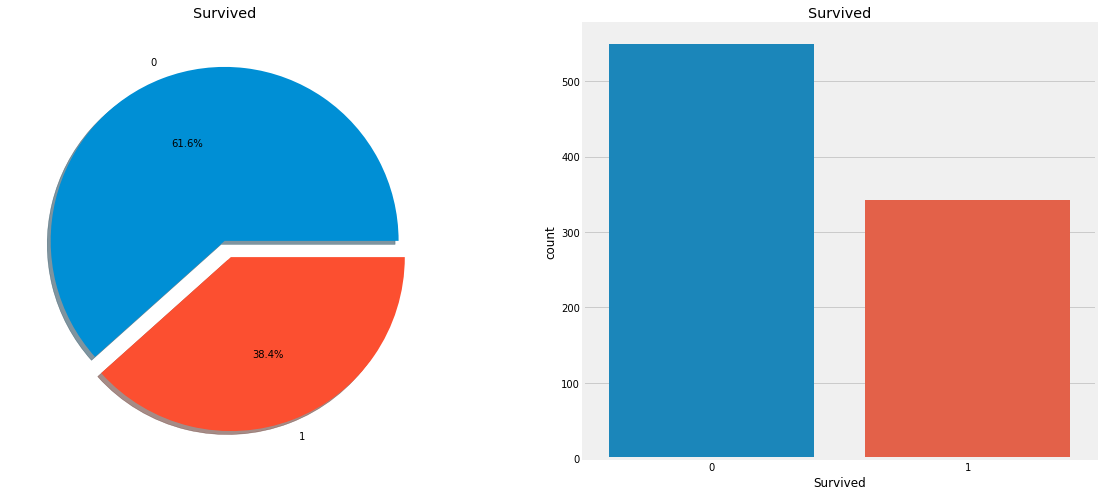

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# ax[0]
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# ax[1]
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Types Of Features

**Categorical Feature:**<br>
두 개 이상의 범주가 있는 변수이며, 범주별로 분류 가능한 feature. 값 사이에 순서를 지정하거나 정렬 불가<br>
ex) Sex(성별), Embarked(승선/C,Q,S)<br>
<br>
**Ordinal Feature**<br>
두 개 이상의 범주가 있는 변수이며, 범주별로 분류 가능한 feature. 값 사이에 순서를 지정하거나 정렬 가능<br>
ex) PClass(1, 2, 3)<br>
<br>
**Continous Feature**<br>
연속적인 수로 수량화가 가능한 변수<br>
ex) Age(나이)

## Analysing The Features

## Sex - Categorical Feature

In [7]:
data.groupby(['Sex','Survived'])['Survived']

In [8]:
data.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

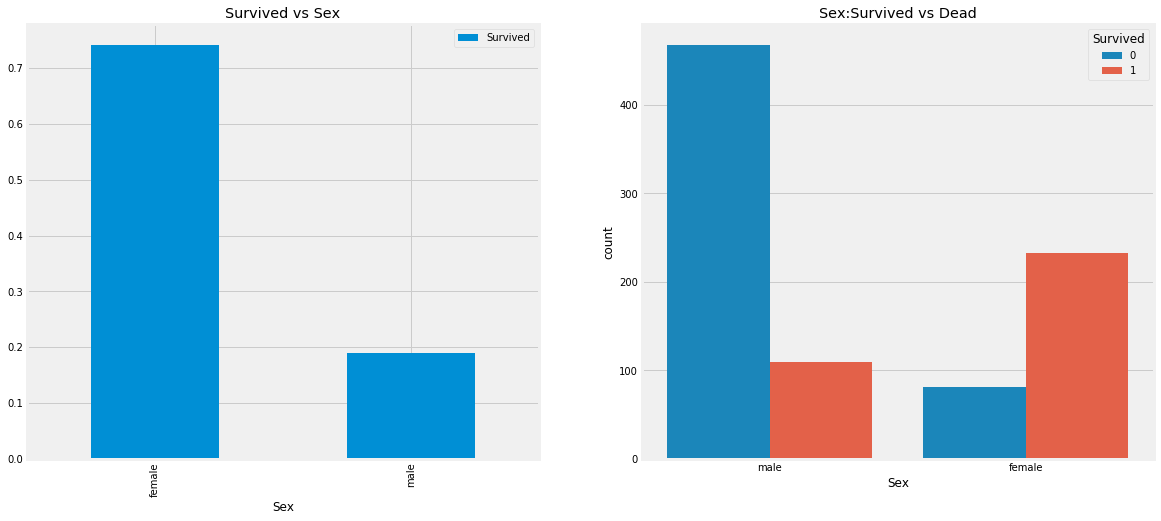

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# ax[0]
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# ax[1]
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## Pclass - Ordinal Feature

In [11]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


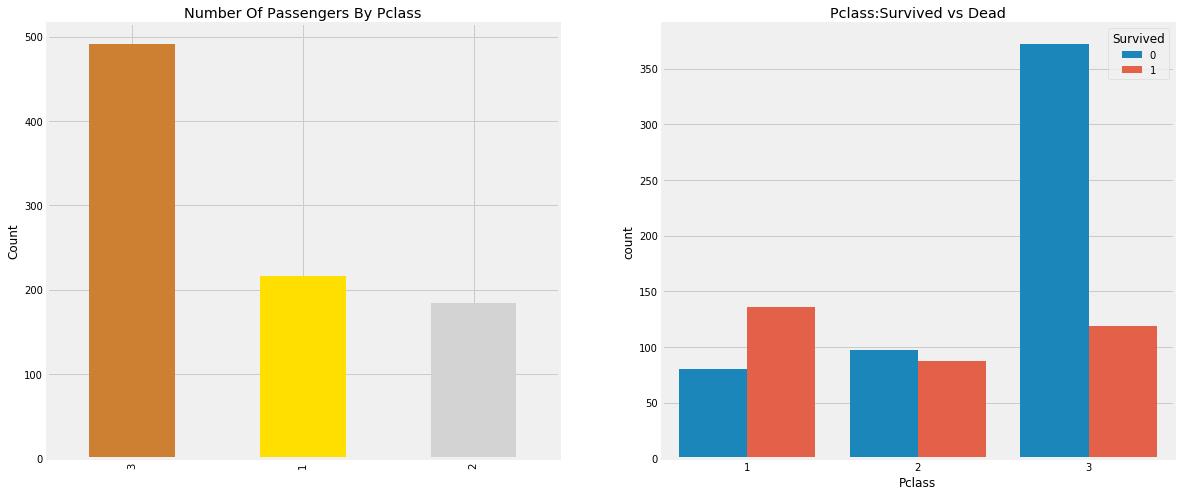

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# ax[0]
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# ax[1]
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [13]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

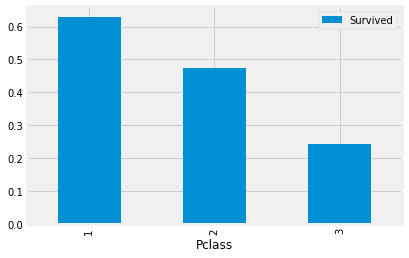

In [14]:
data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

In [15]:
# 두 feature를 동시에 분석하는 것이 중요!
# Lets check survival rate with Sex and Pclass Together.

pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

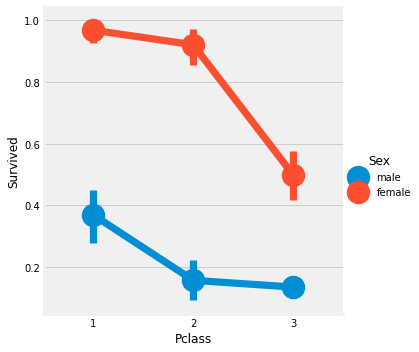

In [16]:
# factorplot: categorical value를 쉽게 분리 가능

sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

## Age - Continous Feature

In [17]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


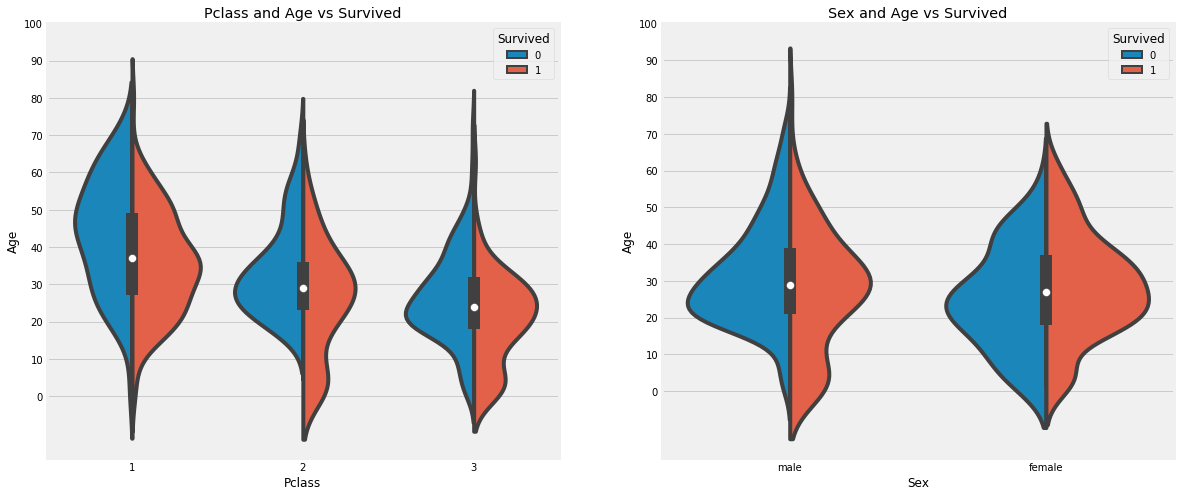

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# ax[0]
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

# ax[1]
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* Pclass 등급이 낮아질수록(1 -> 2 -> 3) 아동 수가 증가함
* Pclass와 상관 없이 아동 생존 수는 많음
* Pclass 1의 20-50대 생존 가능성이 높고 특히 여자가 높음 (?)
* 남성의 경우 나이가 들수록 생존 확률이 감소 (?)

In [19]:
# Name으로 Age를 추측할 수 있기 때문에 Age를 기반으로 Name의 Null값을 채우는 전략

data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [20]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [23]:
data.Initial

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [24]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [25]:
# data 오탈자 수정

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [26]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Filling NaN Ages

In [27]:
## Assigning the NaN Values with the Ceil values of the mean ages

data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [28]:
data.Age.isnull().any() #So no null values left finally 

False

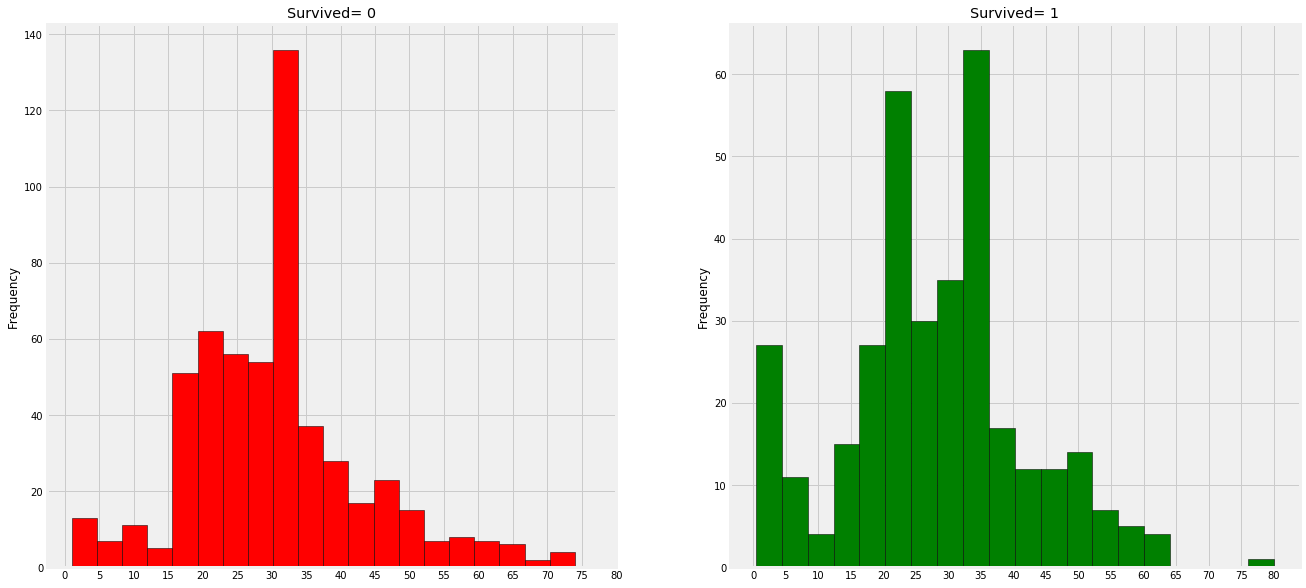

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))

# ax[0]
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

# ax[1]
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

* 아동(5세 이하) / 여자 / 노인(80세)의 생존이 높다.
* 30-40대 범위에서 사망자가 제일 많았다.

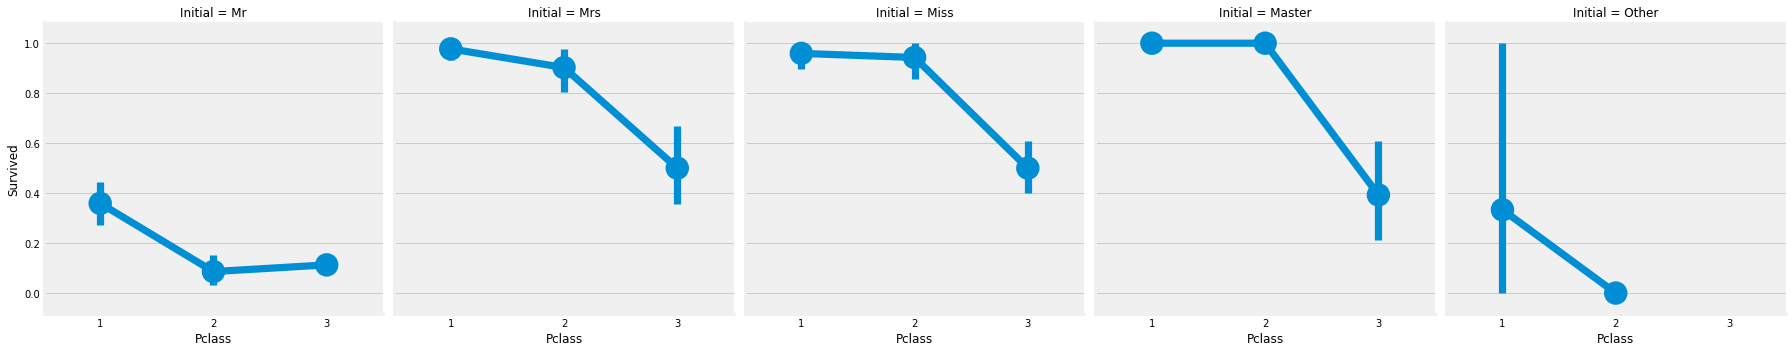

In [30]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

## Embarked(승선) - Categorical Value

In [31]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

## Chances for Survival by Port Of Embarkation

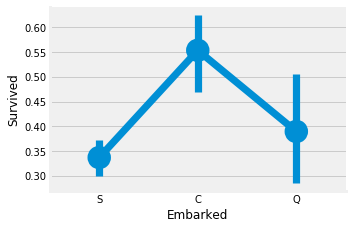

In [32]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

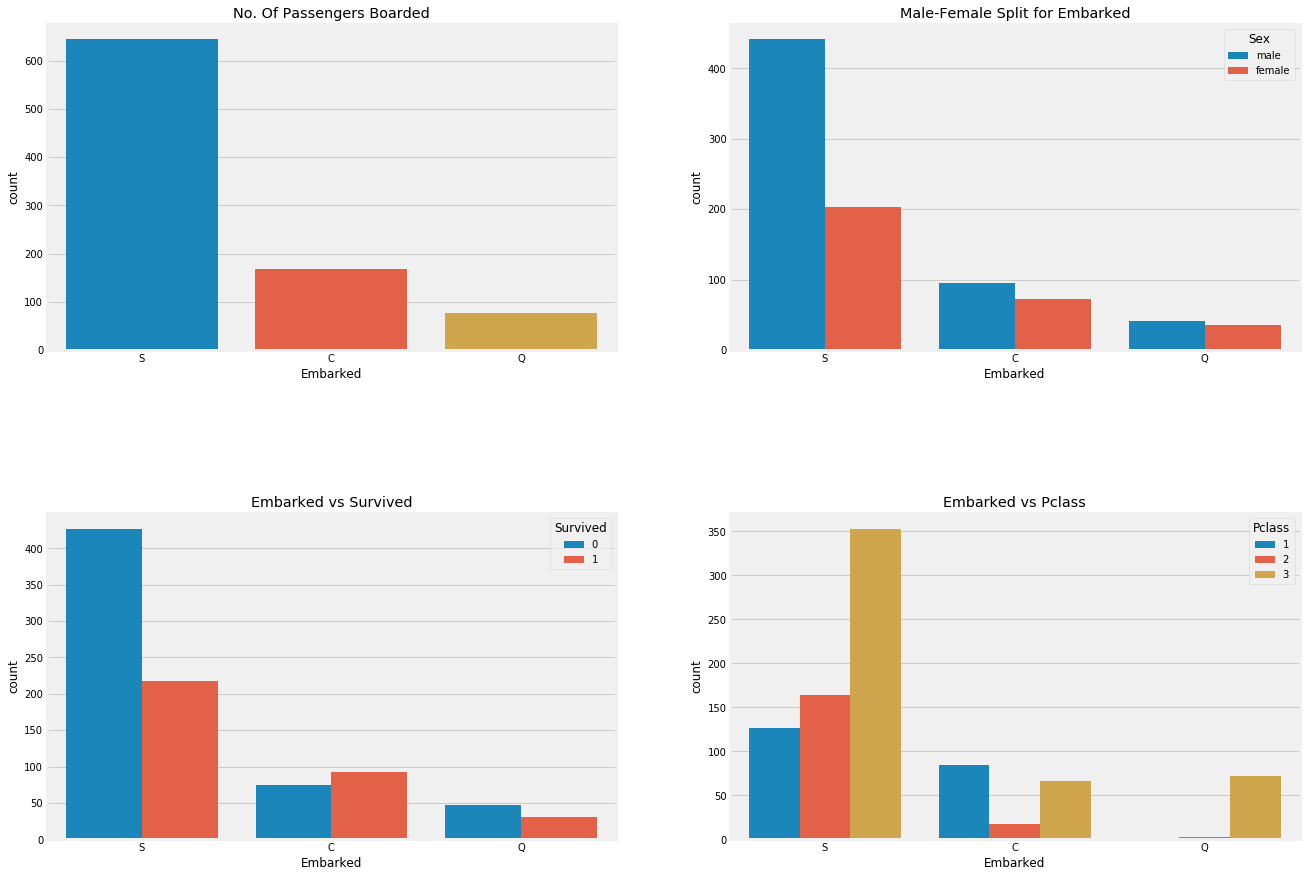

In [33]:
f,ax=plt.subplots(2,2,figsize=(20,15))

# ax[0,0]
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

# ax[0,1]
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

# ax[1,0]
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

# ax[1,1]
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

* S에서 탑승한 승객 대부분이 Pclass 3
* C에서 탑승한 승객의 생존율이 높은데, 이는 Pclass 1 / Pclass 2 승객이 많기 때문

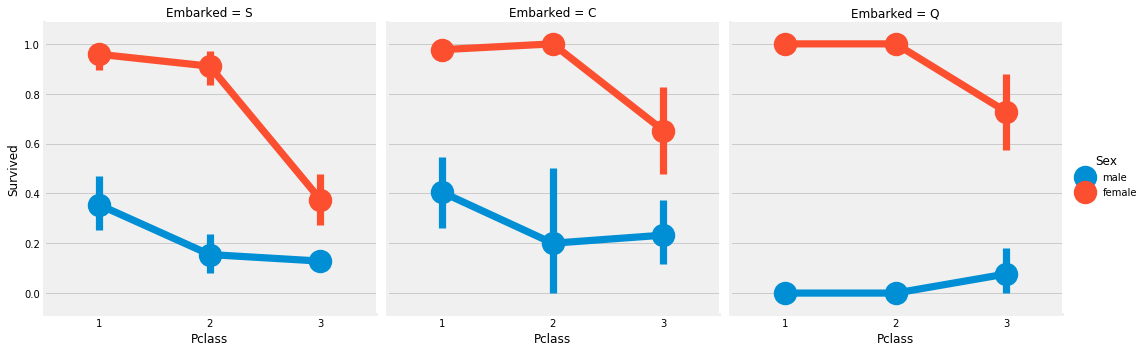

In [34]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

* Pclass 1과 Pclass 2의 여성 생존 확률은 거의 1.0에 수렴
* Port S의 Pclass 3의 생존율이 남녀 모두 매우 낮음

## Filling Embarked NaN

In [35]:
# S가 가장 많으므로, S로 NaN값 대체

data['Embarked'].fillna('S',inplace=True)

In [36]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip(함께 탑승한 형제 또는 배우자 수) - Discrete Feature

This feature represents whether a person is alone or with his family members.<br>
<br>
Sibling = brother, sister, stepbrother, stepsister<br>
<br>
Spouse = husband, wife

In [37]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


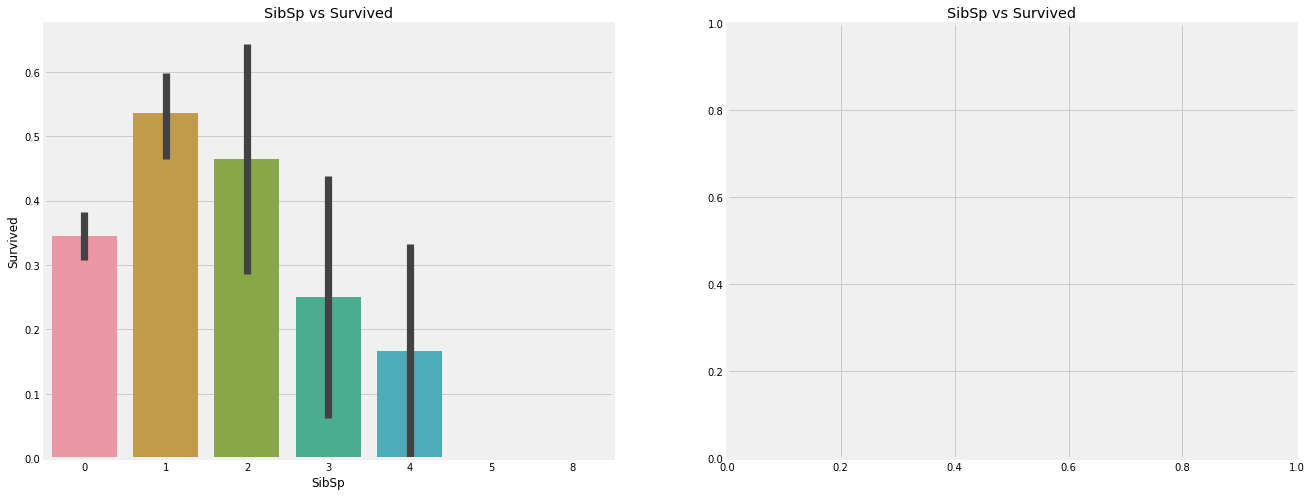

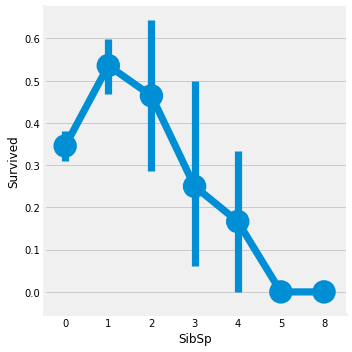

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,8))

# ax[0]
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

# ax[1]
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
# plt.close(2)
plt.show()

In [42]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


* 혼자 탑승하는 경우 생존율이 34.5%
* 혼자보다는 1-2인 같이 탑승한 경우의 생존율이 더 높음
* SibSp가 증가하면 그래프가 대략적으로 감소. 즉, 배에 가족이 있다면 나 자신을 먼저 구하는 것이 아니라 가족을 구하려고 한다는 것을 알 수 있음
* 5-8인 가족의 생존율은 0% --> 5-8인 가족은 모두 Pclass 3 --> Pclass 3의 모든 대가족이 사망했음을 알 수 있음

## Parch(함께 탑승한 부모 또는 자녀 수)

In [43]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


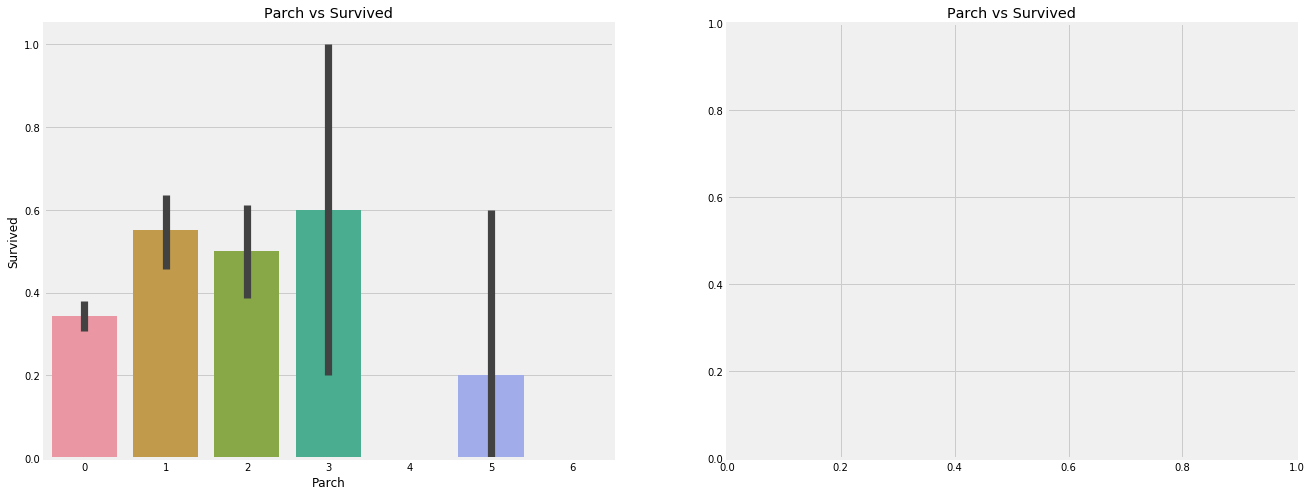

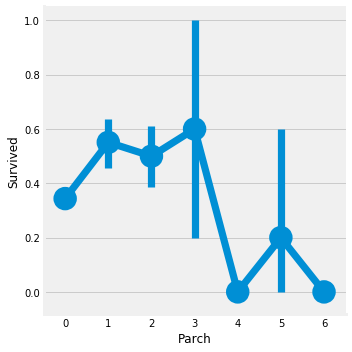

In [45]:
f,ax=plt.subplots(1,2,figsize=(20,8))

# ax[0]
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

# ax[1]
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
# plt.close(2)
plt.show()

* 혼자보다는 1-2인 같이 탑승한 경우의 생존율이 더 높음. 그러나 숫자가 증가할수록 생존율은 감소
* 배에 1-3명의 부모 또는 자녀가 있는 사람에게는 생존율이 높음. 혼자 있는 것 또는 4명 이상인 경우 생존율이 감소

## Fare - Continous Feature

In [46]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


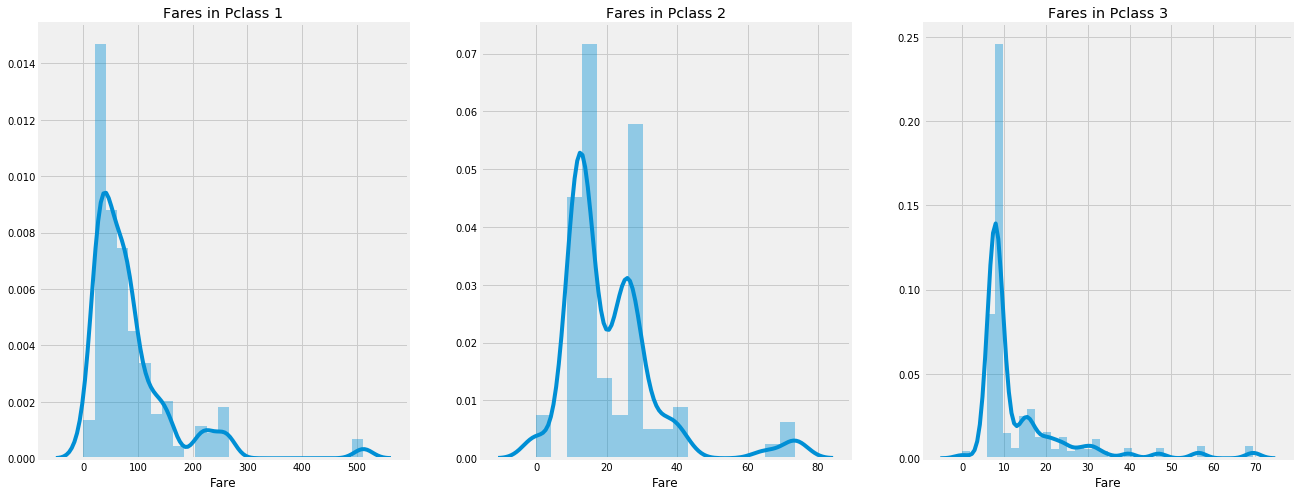

In [47]:
f,ax=plt.subplots(1,3,figsize=(20,8))

# ax[0]
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

# ax[1]
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

# ax[2]
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

<중간 정리><br>
<br>
* Sex: 여성 생존율 > 남성 생존율
* Pclass: 1 > 2 > 3
* Age: 5-10세 어린이 생존율이 높음. 15-35세 사망자가 많음
* Embarked: Pclass 1 승객의 대다수가 S이지만 C에서 생존율이 더 높음. Q의 승객은 모두 Pclass 3
* Parch + SibSp: (1-2명의 형제자매 or 부모자녀) > (혼자 or 대가족)

## Correlation Between The Features

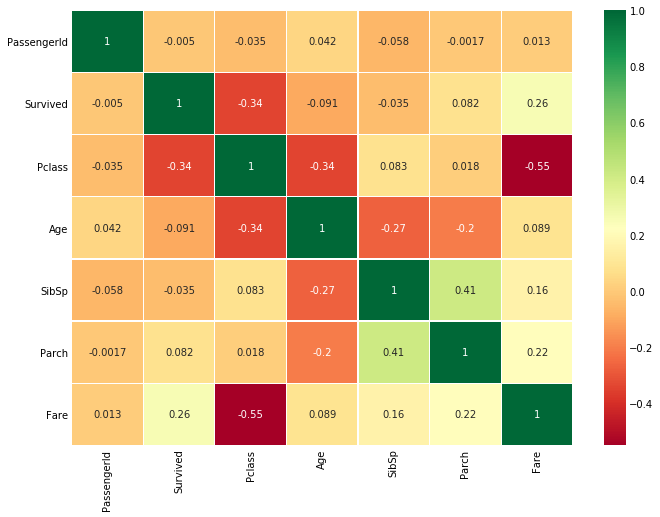

In [48]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Heatmap<br>
<br>
* 알파벳 or 문자열 간의 상관 관계를 알 수 없기 때문에 numeric feature만 비교 가능
* 다중공선성(MultiColinearity): 두 feature의 상관 관계가 매우 높을 때, 이는 두 feature 모두 매우 유사한 정보를 포함하고 있으며 정보의 변동이 거의 없음을 의미 --> model 생성 및 train 시 시간/overfitting 문제를 해결하기 위해 하나의 중복 feature를 제거해야 한다.
* 해당 user는 titanic feature의 상관 관계가 높지 않다고 주장 --> 모두 사용

# Part 2: Feature Engineering and Data Cleaning

(...making...)